# Case Study on Measures of Central Tendency and Dispersion

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_excel("E:\data science\StudentsPerformance.xlsx")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


# 1. Find out how many males and females participated in the test.

In [27]:
print("how many males and females participated in the test:")
print("Male",df['gender'].tolist().count('male'))
print("Female",df['gender'].tolist().count('female'))

how many males and females participated in the test:
Male 482
Female 518


# 2. What do you think about the students' parental level of education?

Students' parental level of education:
 some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59


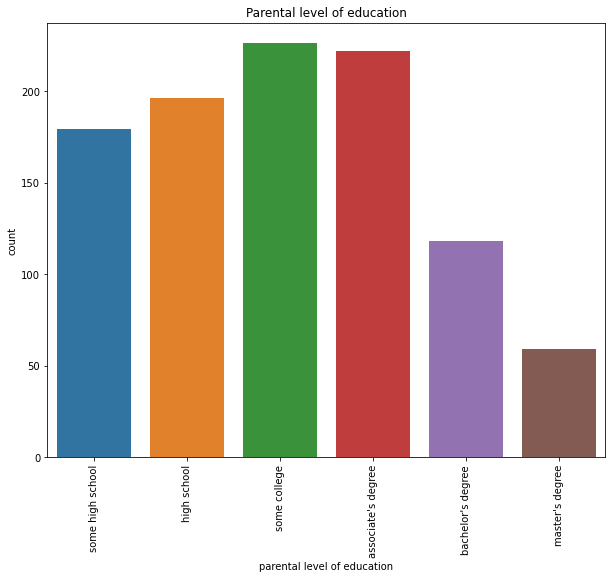

In [52]:
data=df['parental level of education'].value_counts()
print("Students' parental level of education:\n",data.to_string())
plt.figure(figsize=(10,8))
sns.countplot(x='parental level of education',data=df)
plt.title('Parental level of education')
plt.xticks(rotation=90)
plt.show()

# 3. Who scores the most on average for math, reading and writing based on

● Gender


         math score  reading score  writing score
gender                                          
female   63.376448      72.590734      72.467181
male     68.821577      65.545643      63.446058


Text(0.5, 1.0, '\n Average for math, reading and writing based on gender')

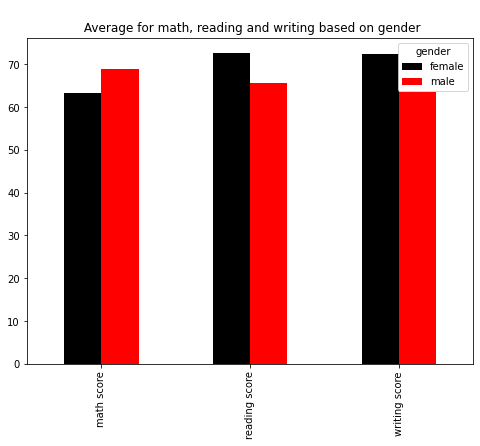

In [75]:
gen=df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
print("\n",gen)
gen.T.plot(kind='bar', figsize=(8,6),color=['black','red'])
plt.title( "\n Average for math, reading and writing based on gender",fontsize=12) 

In this visualization males have more math score and females have more reading and writing scores

● Test preparation course


                          math score  reading score  writing score
test preparation course                                          
completed                  69.96648      74.175978      74.684358
none                       63.78972      66.417445      64.457944


Text(0.5, 1.0, '\n Average for math, reading and writing based on gender')

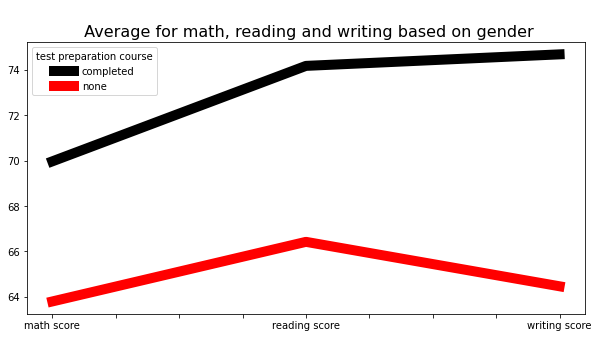

In [102]:
tpc=df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
print("\n",tpc)
tpc.T.plot(figsize=(10,5),color=['black','red'],linewidth=10)
plt.title( "\n Average for math, reading and writing based on gender",fontsize=16)


After test preparation course scoring is higher than that  of others

# 4. What do you think about the scoring variation for math, reading and writing based on


● Gender


         math score  reading score  writing score
gender                                          
female   16.029928      14.411018      14.844842
male     14.556411      14.149594      14.227225


Text(0.5, 1.0, '\n Scoring variation for math, reading and writing based on gender')

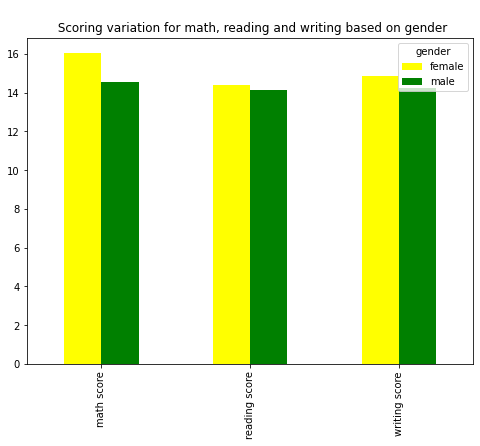

In [98]:
gen=df.groupby('gender')[['math score', 'reading score', 'writing score']].std()
print("\n",gen)
gen.T.plot(kind='bar', figsize=(8,6),color=['yellow','green'])
plt.title( "\n Scoring variation for math, reading and writing based on gender",fontsize=12)


Scoring variation for math, reading and writing based on gender,females have more scoring performance


● Test preparation course


                          math score  reading score  writing score
test preparation course                                          
completed                 14.521847      13.537572      13.236412
none                      15.705689      14.608896      15.041667


Text(0.5, 1.0, '\n Scoring variation for math, reading and writing based on Test preparation course')

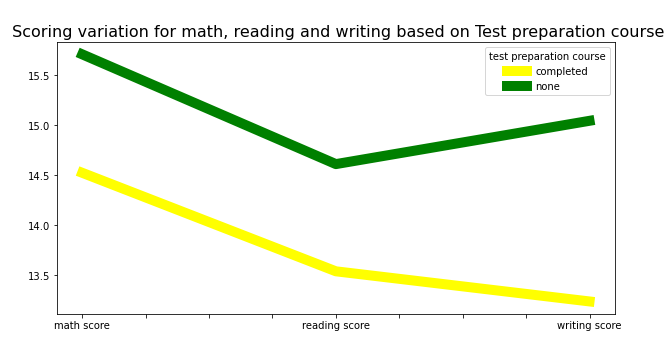

In [101]:
tpc=df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].std()
print("\n",tpc)
tpc.T.plot(figsize=(10,5),color=['yellow','green'],linewidth=10)
plt.title( "\n Scoring variation for math, reading and writing based on Test preparation course",fontsize=16)

scoring  after test preparation is decreasing

# 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [91]:
df.quantile(0.75)['math score']


77.0

In [90]:
df.quantile(1.0)['math score']

100.0



Math scores range from 100 to 77 for the top 25% of students.


In [85]:
df.sort_values('math score',ascending=False)
df.reset_index()
print('\nTop 25 % students based on math score are:')
df[df['math score']>=77.0]


Top 25 % students based on math score are:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
414,female,group A,high school,free/reduced,completed,77,88,85,83.333333
415,female,group B,master's degree,free/reduced,completed,77,97,94,89.333333
416,female,group B,bachelor's degree,free/reduced,none,77,85,87,83.000000
417,female,group B,master's degree,standard,none,77,90,84,83.666667
418,female,group B,high school,standard,completed,77,82,89,82.666667
...,...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81,89.000000
996,male,group A,some college,standard,completed,100,96,86,94.000000
997,male,group D,some college,standard,completed,100,97,99,98.666667
998,male,group E,associate's degree,free/reduced,completed,100,100,93,97.666667
